___
# GETTING STARTED
___

## Add Path and Import

In [1]:
# add the path where the mke_sculib is installed

import os, inspect, sys, time
current_dir = os.getcwd()
parent_dir = os.path.join(os.path.dirname(current_dir), 'src')
if __name__ == '__main__':
    print(parent_dir)
    sys.path.insert(0, parent_dir)



C:\Users\tglaubach\repos\sculib\src


In [2]:
import mke_sculib

print(mke_sculib.__version__)
print(mke_sculib.__file__)


2.6.8
C:\Users\tglaubach\repos\sculib\src\mke_sculib\__init__.py


# First Steps

___
### Connecting to a Dish
you can construct a dish api object by IP or URL

examples:
```python
mke_sculib.scu_api('http://10.96.66.10:8080/')
mke_sculib.scu_api('10.96.66.10')
mke_sculib.scu_api(ip='10.96.66.10', port=8080)
mke_sculib.scu_api(address='http://10.96.66.10:8080/')
```

the code below shows how to construct a dish, and give it the antenna_id "119" (which is just a name as a string and has no further significance)

In [3]:
api = mke_sculib.scu_api('http://10.96.66.10:8080/', antenna_id='119')
api

scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (unverified)

"unverified" means that there was no connection to the dish yet and the dish_type "mke" is an assumption. This will change, once we validate the connection to the dish.

___
### Validating the connection

The connection to the dish is done mostly by HTTP requests. So there is no need to actively "connect" to the dish. You can ping the dish by 

In [4]:
api.ping()

True

and determine, which software / dish type the endpoint is like this

In [5]:
api.determine_dish_type()

'mke'

when we now check the dish type again, we will see, that the dish_type changed to "mke" (verified). This means, we have successfully connected to a dish and determined, that it is indeed a "mke" type dish. 

In [6]:
api

scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (verified)

___
### Showing the Dish Status


You can get a quick status overview like this:

In [7]:
api.status()

[2024-10-12 19:43:38.38Z - sculib] 10.96.66.10 starting data stream in new thread...
[2024-10-12 19:43:39.49Z - sculib] 10.96.66.10 --> datasteam started...
[2024-10-12 19:43:39.49Z - sculib] 10.96.66.10 waiting for data stream to provide first data...
[2024-10-12 19:43:40.20Z - sculib] 10.96.66.10 --> stream started OK
scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (verified)
| state      | SIP                              |
| AZ/EL      | 180.3°/ 31.9°                    |
| time (UTC) | 2024-10-12 19:43:43.945          |
| ALL CLEAR? | PASS!  (@: 2024-10-12 19:43:42Z) |
ERRORS: "acu.general_management_and_controller.error_status.pwr_error"


You can either print the detailed current dish status in ascii to the console like this:

In [8]:
api.print_info()

               <<=== DISH: "119" ===>>
____________________________________________________________________________________________________
STATUS: 
+-------------+-------------------------+-----------------+---------------+---------------------------+
| Dish-Type   | address                 | current state   | Az/EL [deg]   | current (UTC) timestamp   |
+=============+=========================+=================+===============+===========================+
| mke         | http://10.96.66.10:8080 | SIP             | 180.3°/ 31.9° | 2024-10-12 19:43:45.545   |
+-------------+-------------------------+-----------------+---------------+---------------------------+

| SPEM                | OFF   || ATCORR              | OFF   || INCL                | OFF   |
| temp_az_i_o_unit    | 40.9° || temp_el_i_o_unit    | 35.3° || temp_fi_i_o_unit    | 38.4° |
| temp_emisc          | 34.3° || temp_drive_cab      | 33.5° || temp_air_outlet_psc | 32.8° |
| temp_az_motor_1     | 37.0° || temp_az_motor_2

Or if you are within an iPython environment (like jupyter) you can directly show the status as HTML

In [9]:
api.show()

___
### Getting Sensor Values from the dish

you can get all available channel names by calling

In [10]:
api.get_channel_list()

['acu.message_length',
 'acu.message_counter',
 'acu.actual_timestamp',
 'acu.general_management_and_controller.ds_software_version_major',
 'acu.general_management_and_controller.ds_software_version_minor',
 'acu.general_management_and_controller.ds_software_version_fix',
 'acu.general_management_and_controller.state',
 'acu.general_management_and_controller.bit_status.low_power_mode_active',
 'acu.general_management_and_controller.bit_status.not_used_1',
 'acu.general_management_and_controller.bit_status.not_used_2',
 'acu.general_management_and_controller.bit_status.hhd_connected',
 'acu.general_management_and_controller.bit_status.lmc_cmd_if_connected',
 'acu.general_management_and_controller.bit_status.lmc_sts_if_connected',
 'acu.general_management_and_controller.bit_status.mtm_gui_cmd_if_connected',
 'acu.general_management_and_controller.bit_status.mtm_gui_sts_if_connected',
 'acu.general_management_and_controller.bit_status.scu_cmd_if_connected',
 'acu.general_management_and_c

you can query one or more channels by indexing with the channel name


In [11]:
api['acu.general_management_and_controller.on_source_deviation_rms']

0.0004686230189692433

In [12]:
api[['acu.general_management_and_controller.p_act_az', 'acu.general_management_and_controller.p_act_el']]

[180.27967487120628, 31.893860760569567]

you can also use the high level methot `getc(...)` to achieve the same result. This method also allows to retrieve the channels as dict.  

In [13]:
print(api.getc(['acu.general_management_and_controller.p_act_az', 'acu.general_management_and_controller.p_act_el']))
print(api.getc(['acu.general_management_and_controller.p_act_az', 'acu.general_management_and_controller.p_act_el'], as_dict=True))

[180.27967487120628, 31.893860760569567]
{'acu.general_management_and_controller.p_act_az': 180.27967487120628, 'acu.general_management_and_controller.p_act_el': 31.893860760569567}


if `getc(...)` is called without channel names it will instead return ALL available channels with values as dict

In [14]:
channels_with_values = api.getc(as_dict=True)
channels_with_values

{'acu.message_length': '1710',
 'acu.message_counter': '2025',
 'acu.actual_timestamp': 60595.822088483794,
 'acu.general_management_and_controller.ds_software_version_major': '6',
 'acu.general_management_and_controller.ds_software_version_minor': '2',
 'acu.general_management_and_controller.ds_software_version_fix': '3',
 'acu.general_management_and_controller.state': '110',
 'acu.general_management_and_controller.bit_status.low_power_mode_active': False,
 'acu.general_management_and_controller.bit_status.not_used_1': False,
 'acu.general_management_and_controller.bit_status.not_used_2': False,
 'acu.general_management_and_controller.bit_status.hhd_connected': False,
 'acu.general_management_and_controller.bit_status.lmc_cmd_if_connected': True,
 'acu.general_management_and_controller.bit_status.lmc_sts_if_connected': True,
 'acu.general_management_and_controller.bit_status.mtm_gui_cmd_if_connected': True,
 'acu.general_management_and_controller.bit_status.mtm_gui_sts_if_connected': 

___
### Operating / Moving the Dish

In order to start the dish use the high level method `start()`


In [15]:
# api.start()

In [16]:
api.status()

scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (verified)
| state      | SIP                              |
| AZ/EL      | 180.3°/ 31.9°                    |
| time (UTC) | 2024-10-12 19:43:50.145          |
| ALL CLEAR? | PASS!  (@: 2024-10-12 19:43:48Z) |
ERRORS: "acu.general_management_and_controller.error_status.pwr_error"


the dish can be moved in AZ-EL like this

In [17]:
api.move(az=15, el=85) # or equivalent api.move(15, 85)

[2024-10-12 19:43:49.15Z - sculib] Starting event stream because method with name "move_to_azel"  requested it
[2024-10-12 19:43:49.15Z - sculib] 10.96.66.10 starting event stream in new thread...
[2024-10-12 19:43:49.15Z - sculib] 10.96.66.10 --> eventstream started...
[2024-10-12 19:43:49.15Z - sculib] move to az: 15.0000 el: 85.0000


In [18]:
api.wait_duration(1)
api.status()

[2024-10-12 19:44:50.98Z - sculib] wait for 1.0s
scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (verified)
| state      | SIP                              |
| AZ/EL      | 15.0°/ 85.0°                     |
| time (UTC) | 2024-10-12 19:44:54.645          |
| ALL CLEAR? | PASS!  (@: 2024-10-12 19:44:53Z) |
ERRORS: "acu.general_management_and_controller.error_status.pwr_error"


the feed indexer can be moved like this:

In [19]:
api.move(band='Band 5b')

[2024-10-12 19:44:53.71Z - sculib] move to band:Band 5b


once you are done with the dish you can stow it and shuit it down like this

In [20]:
api.shutdown()

[2024-10-12 19:44:58.46Z - sculib] === INITIATING SHUTDOWN ROUTINE ===
[2024-10-12 19:44:59.06Z - sculib] Stowing...
[2024-10-12 19:44:59.65Z - sculib] move to az: 1.0000 el: 88.7500
[2024-10-12 19:45:11.59Z - sculib] wait for 0.5s
[2024-10-12 19:45:15.62Z - sculib] wait for 0.5s
[2024-10-12 19:45:16.12Z - sculib] wait for 1.0s
[2024-10-12 19:45:18.72Z - sculib] wait for acu.stow_pin_controller.azimuth_status: 3 (currently at: 1)
[2024-10-12 19:45:51.56Z - sculib]   -> done
[2024-10-12 19:45:53.06Z - sculib] Releasing Command Authority...
[2024-10-12 19:45:54.06Z - sculib] === SHUTDOWN ROUTINE COMPLETED ===


In [21]:
api.wait_duration(1)
api.status()

[2024-10-12 19:45:54.08Z - sculib] wait for 1.0s
scu object with antenna_id: "119" @http://10.96.66.10:8080, dish_type: "mke" (verified)
| state      | Stowed                           |
| AZ/EL      | -0.0°/ 89.7°                     |
| time (UTC) | 2024-10-12 19:45:57.645          |
| ALL CLEAR? | PASS!  (@: 2024-10-12 19:45:56Z) |
ERRORS: "acu.general_management_and_controller.error_status.pwr_error"


___
### Subscribing to update callbacks



#### Logging data

In [22]:

# this is a simple logging function, which will log data updates to stdout
def print_new_data(time_astropy, data_dict):
    print(f'{time.time():.2f} new data tick at {time_astropy.iso}, with data for N={len(data_dict)} channels | {id(data_dict)=}, {sys.getsizeof(data_dict)=}')

        
api.callbacks_on_new_data.append(print_new_data)
api.wait_duration(2)
api.callbacks_on_new_data.clear()

[2024-10-12 19:45:56.72Z - sculib] wait for 2.0s
1728762356.81 new data tick at 2024-10-12 19:45:57.845, with data for N=752 channels | id(data_dict)=2727656269760, sys.getsizeof(data_dict)=26032
1728762356.91 new data tick at 2024-10-12 19:45:57.945, with data for N=752 channels | id(data_dict)=2727665037632, sys.getsizeof(data_dict)=26032
1728762357.01 new data tick at 2024-10-12 19:45:58.045, with data for N=752 channels | id(data_dict)=2727664259200, sys.getsizeof(data_dict)=26032
1728762357.11 new data tick at 2024-10-12 19:45:58.145, with data for N=752 channels | id(data_dict)=2727665036928, sys.getsizeof(data_dict)=26032
1728762357.22 new data tick at 2024-10-12 19:45:58.245, with data for N=752 channels | id(data_dict)=2727663602560, sys.getsizeof(data_dict)=26032
1728762357.32 new data tick at 2024-10-12 19:45:58.345, with data for N=752 channels | id(data_dict)=2727586843200, sys.getsizeof(data_dict)=26032
1728762357.41 new data tick at 2024-10-12 19:45:58.445, with data for

#### Plotting data

[2024-10-12 19:45:58.74Z - sculib] wait for 5.0s
1728762363.74 | stopping...


array([<Axes: >, <Axes: >], dtype=object)

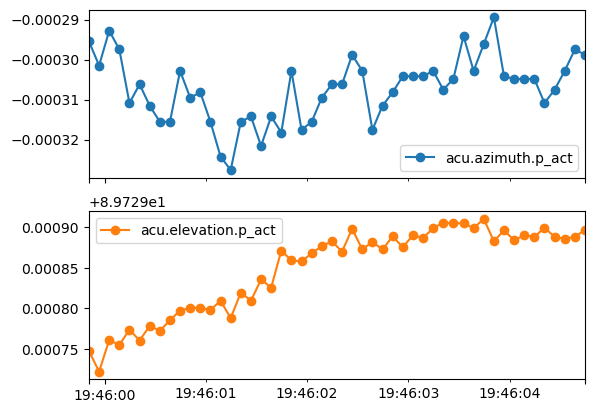

In [23]:
import pandas as pd

# this is a callback which will log all data to an array
data = []
def gather_data_update(time_astropy, data_dict):
    data.append((time_astropy.datetime, data_dict))

api.callbacks_on_new_data.append(gather_data_update)
api.wait_duration(5)

print(f'{time.time():.2f} | stopping...')
api.callbacks_on_new_data.clear()

# then plot the array using pandas
dataframe = pd.DataFrame(dict(data)).T
dataframe[['acu.azimuth.p_act', 'acu.elevation.p_act']].plot(style = '-o', subplots=True)

#### Realtime Updates via Jupyter Widget

In [24]:
import ipywidgets as widgets

# this is a jupyter widget which will update in real-time
caption = widgets.Label(value='I am a Widget! no callback yet.')
def handle_data_update(time_astropy, data_dict):
    caption.value = f'I am a Widget! {time.time():.2f} new data tick at {time_astropy.iso}, with data for N={len(data_dict)} channels | {id(data_dict)=}, {sys.getsizeof(data_dict)=}'

api.callbacks_on_new_data.append(handle_data_update)
display(caption)
api.wait_duration(5)
print(f'{time.time():.2f} | stopping...')

api.callbacks_on_new_data.clear()


Label(value='I am a Widget! no callback yet.')

[2024-10-12 19:46:10.70Z - sculib] wait for 5.0s
1728762375.70 | stopping...


#### Subscibing to new events

In [25]:
def on_new_event(e):
    print(f'{time.time():.2f}, new event wiith uuid {e.uuid}!')
    print(e.to_str())
    
api.callbacks_on_new_events.append(on_new_event)

# send some command to see some events coming in
api.reset_dmc()

api.wait_duration(5)
print(f'{time.time():.2f} | stopping...')

api.callbacks_on_new_events.clear()



[2024-10-12 19:46:15.72Z - sculib] reset dmc...
1728762376.10, new event wiith uuid 37a473b3-8437-484b-95f9-091b24422e44!
Event 37a473b3-8437-484b-95f9-091b24422e44: @None | State: PENDING | path: dish_management_controller.reset
1728762376.12, new event wiith uuid 37a473b3-8437-484b-95f9-091b24422e44!
Event 37a473b3-8437-484b-95f9-091b24422e44: @None | State: TRANSFERRED | path: dish_management_controller.reset
1728762376.46, new event wiith uuid 37a473b3-8437-484b-95f9-091b24422e44!
Event 37a473b3-8437-484b-95f9-091b24422e44: @None | State: COMPLETED | path: dish_management_controller.reset
[2024-10-12 19:46:16.50Z - sculib] wait for 5.0s
1728762381.50 | stopping...


___
### Getting the logs
#### Show N last Events

In [26]:
api.get_events(20)

timestamp   source  \
time                                                                           
2024-10-12 19:46:17.475534800+00:00  2024-10-12T19:46:17.475534800Z  Devices   
2024-10-12 19:46:17.134132200+00:00  2024-10-12T19:46:17.134132200Z  Devices   
2024-10-12 19:46:17.120132700+00:00  2024-10-12T19:46:17.120132700Z  Devices   
2024-10-12 19:45:55.025965100+00:00  2024-10-12T19:45:55.025965100Z  Devices   
2024-10-12 19:45:54.709820800+00:00  2024-10-12T19:45:54.709820800Z  Devices   
2024-10-12 19:45:54.682824300+00:00  2024-10-12T19:45:54.682824300Z  Devices   
2024-10-12 19:45:19.176853400+00:00  2024-10-12T19:45:19.176853400Z  Devices   
2024-10-12 19:45:19.076624100+00:00  2024-10-12T19:45:19.076624100Z  Devices   
2024-10-12 19:45:18.784413900+00:00  2024-10-12T19:45:18.784413900Z  Devices   
2024-10-12 19:45:18.743697+00:00        2024-10-12T19:45:18.743697Z  Devices   
2024-10-12 19:45:12.526456500+00:00  2024-10-12T19:45:12.526456500Z  Devices   
2024-10-12 19:45:01.626678800+00:00  2024-10-12T19:45:01.626678800Z  Devices   
2024-10-12 19:45:01.309998600+00:00  2024-10-12T19:45:01.309998600Z  Devices   
2024-10-12 19:45:01.268457200+00:00  2024-10-12T19:45:01.268457200Z  Devices   
2024-10-12 19:44:59.377150700+00:00  2024-10-12T19:44:59.377150700Z  Devices   
2024-10-12 19:44:55.677360200+00:00  2024-10-12T19:44:55.677360200Z  Devices   
2024-10-12 19:44:55.385032400+00:00  2024-10-12T19:44:55.385032400Z  Devices   
2024-10-12 19:44:55.326668+00:00        2024-10-12T19:44:55.326668Z  Devices   
2024-10-12 19:44:51.927298+00:00        2024-10-12T19:44:51.927298Z  Devices   
2024-10-12 19:43:51.128372500+00:00  2024-10-12T19:43:51.128372500Z  Devices   

                                                             codeName level  \
time                                                                          
2024-10-12 19:46:17.475534800+00:00  DEVICE_COMMAND_COMPLETED_WARNING  WARN   
2024-10-12 19:46:17.134132200+00:00        DEVICE_COMMAND_TRANSFERRED  INFO   
2024-10-12 19:46:17.120132700+00:00            DEVICE_COMMAND_PENDING  INFO   
2024-10-12 19:45:55.025965100+00:00       DEVICE_COMMAND_COMPLETED_OK  INFO   
2024-10-12 19:45:54.709820800+00:00        DEVICE_COMMAND_TRANSFERRED  INFO   
2024-10-12 19:45:54.682824300+00:00            DEVICE_COMMAND_PENDING  INFO   
2024-10-12 19:45:19.176853400+00:00       DEVICE_COMMAND_COMPLETED_OK  INFO   
2024-10-12 19:45:19.076624100+00:00          DEVICE_COMMAND_ACTIVATED  INFO   
2024-10-12 19:45:18.784413900+00:00        DEVICE_COMMAND_TRANSFERRED  INFO   
2024-10-12 19:45:18.743697+00:00               DEVICE_COMMAND_PENDING  INFO   
2024-10-12 19:45:12.526456500+00:00       DEVICE_COMMAND_COMPLETED_OK  INFO   
2024-10-12 19:45:01.626678800+00:00          DEVICE_COMMAND_ACTIVATED  INFO   
2024-10-12 19:45:01.309998600+00:00        DEVICE_COMMAND_TRANSFERRED  INFO   
2024-10-12 19:45:01.268457200+00:00            DEVICE_COMMAND_PENDING  INFO   
2024-10-12 19:44:59.377150700+00:00       DEVICE_COMMAND_COMPLETED_OK  INFO   
2024-10-12 19:44:55.677360200+00:00          DEVICE_COMMAND_ACTIVATED  INFO   
2024-10-12 19:44:55.385032400+00:00        DEVICE_COMMAND_TRANSFERRED  INFO   
2024-10-12 19:44:55.326668+00:00               DEVICE_COMMAND_PENDING  INFO   
2024-10-12 19:44:51.927298+00:00          DEVICE_COMMAND_COMPLETED_OK  INFO   
2024-10-12 19:43:51.128372500+00:00          DEVICE_COMMAND_ACTIVATED  INFO   

                                    visible      id  \
time                                                  
2024-10-12 19:46:17.475534800+00:00    true  127534   
2024-10-12 19:46:17.134132200+00:00    true  127533   
2024-10-12 19:46:17.120132700+00:00    true  127532   
2024-10-12 19:45:55.025965100+00:00    true  127531   
2024-10-12 19:45:54.709820800+00:00    true  127530   
2024-10-12 19:45:54.682824300+00:00    true  127529   
2024-10-12 19:45:19.176853400+00:00    true  127528   
2024-10-12 19:45:19.076624100+00:00    true  127527   
2024-10-

#### Show all REST API calls

In [27]:
api.call_log

{datetime.datetime(2024, 10, 12, 19, 43, 36, 557991): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 43, 37, 735139): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 43, 38, 389051): 'GET | /devices/getAllDeviceStatusValues',
 datetime.datetime(2024, 10, 12, 19, 43, 43, 383986): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 43, 45, 22421): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 43, 46, 240949): 'GET | /devices/getAllDeviceStatusValues',
 datetime.datetime(2024, 10, 12, 19, 43, 47, 963722): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 43, 49, 158558): 'PUT | /devices/command',
 datetime.datetime(2024, 10, 12, 19, 44, 52, 359807): 'GET | /devices/statusPaths',
 datetime.datetime(2024, 10, 12, 19, 44, 53, 710515): 'PUT | /devices/command',
 datetime.datetime(2024, 10, 12, 19, 44, 59, 653496): 'PUT | /devices/command',
 datetime.datetime(2024, 10, 12, 19, 45, 17, 126299): 'PUT | /d

___
## Tracking an Astronomical Target over X Seconds

In [28]:
%reload_ext mke_sculib

In [29]:
api = mke_sculib.load('119A')

could not load "params_json" from server
[2024-10-12 19:46:23.78Z - sculib] loaded dish: scu object with antenna_id: "119A" @http://10.96.66.10:8080, dish_type: "mke" (verified)


In [30]:
# we need numpy and astropy for this
import numpy as np
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import get_icrs_coordinates, EarthLocation, AltAz, SkyCoord


In [31]:
# we will move the dish to the location close to where we want to track a target first
# the target is close to the southern celestial pole, so move to AZ=180, EL=30 to be close to to there
# NOTE: This is optional but will make sure, that the dish is not "slewing" to the tracking position for so long.
api.start()
api.move(180, 30)

[2024-10-12 19:46:24.29Z - sculib] === INITIATING STARTUP ROUTINE ===
[2024-10-12 19:46:24.29Z - sculib] Getting Command Authority...
[2024-10-12 19:46:24.29Z - sculib] Starting event stream because method with name "_command_authority"  requested it
[2024-10-12 19:46:24.29Z - sculib] 10.96.66.10 starting event stream in new thread...
[2024-10-12 19:46:24.30Z - sculib] 10.96.66.10 --> eventstream started...
[2024-10-12 19:46:25.07Z - sculib] wait for 0.1s
[2024-10-12 19:46:26.05Z - sculib] wait for 0.1s
[2024-10-12 19:46:26.15Z - sculib] reset dmc...
[2024-10-12 19:46:27.93Z - sculib] 10.96.66.10 starting data stream in new thread...
[2024-10-12 19:46:28.90Z - sculib] 10.96.66.10 --> datasteam started...
[2024-10-12 19:46:29.50Z - sculib] Unstowing...
[2024-10-12 19:46:57.20Z - sculib] activate dmc...
[2024-10-12 19:47:10.39Z - sculib] Acknowledge interlock...
[2024-10-12 19:47:11.40Z - sculib] === STARTUP ROUTINE COMPLETED ===
[2024-10-12 19:47:11.40Z - sculib] move to az: 180.0000 el

In [32]:

# setup the dish location
loc = EarthLocation(lat = -30.778551, lon = 21.397161, height = 1094.6*u.m)  

# observation time from 10seconds ago for the next 60s
t = Time.now() + np.arange(-10, 60, 1.0) * u.s

# this would be how to manualkly set up a target
# ra = 21 target right ascension
# dec = -88 # target declination
# pm_ra = 0 # proper motion right ascension
# pm_dec = 0 # proper motion declination
# trgt = SkyCoord(ra=ra, dec=dec, pm_ra_cosdec=pm_ra, pm_dec=pm_dec, obstime=Time('J2000'))

# this is how to query a location from a catalogue
# now that we have the astronomical target, location and time, we need to transform it to AltAz (Azimuth, Elevation) for the telescope location
altaz = get_icrs_coordinates('HIP104382').transform_to(AltAz(location=loc, obstime=t))
# the dish needs the time inputs in mjd, az in degree and el in degree
tracking_table = pd.DataFrame({'time': t.mjd, 'az': altaz.az.deg, 'el': altaz.alt.deg})
tracking_table

time          az         el
0   60595.825094  180.413192  31.864963
1   60595.825105  180.413286  31.864937
2   60595.825117  180.413379  31.864911
3   60595.825129  180.413472  31.864885
4   60595.825140  180.413565  31.864860
..           ...         ...        ...
65  60595.825846  180.419247  31.863267
66  60595.825858  180.419340  31.863241
67  60595.825869  180.419433  31.863215
68  60595.825881  180.419526  31.863188
69  60595.825893  180.419619  31.863162

[70 rows x 3 columns]

In [33]:
# now that we have the tracking table we can run it

with api.with_tt(df=tracking_table) as track:
    print('tracking...')
    while track.get_t_remaining() > 0:
        print(f'{track.get_t_remaining()=} {api.azel=} {api.get_state()}')
        api.wait_duration(1)

last_session = api.get_session_as_df() # alternatively last_session = track.session

last_session    

[2024-10-12 19:48:23.77Z - sculib] Requesting stop program track
[2024-10-12 19:48:23.77Z - sculib] acu ska track stop loading table
[2024-10-12 19:48:30.95Z - sculib] Uploading tracking table...
[2024-10-12 19:48:30.96Z - sculib] Running Table (2024-10-12 19:48:08.115184, 180.413, 31.865) --> (2024-10-12 19:49:17.115184, 180.420, 31.863) T=69.00 N=70, dt_min=0.999999046326
[2024-10-12 19:48:30.96Z - sculib] uploading acu-ska-track with 3079 char size...
[2024-10-12 19:48:32.18Z - sculib] Starting logger with config: full_configuration ...
[2024-10-12 19:48:32.60Z - sculib] Waiting for state to be either TRACK or SLEW...
[2024-10-12 19:48:33.12Z - sculib] wait for acu.general_management_and_controller.state: ['TRACK', 'SLEW'] (currently at: 110)
[2024-10-12 19:48:33.88Z - sculib]   -> done
tracking...
track.get_t_remaining()=42.3701835796237 api.azel=(180.00140909695625, 30.00056250715255) Slew
[2024-10-12 19:48:34.50Z - sculib] wait for 1.0s
track.get_t_remaining()=40.670183999463916 

acu.message_length  acu.message_counter  \
2024-10-12 19:48:33.545000+00:00                1710                 4876   
2024-10-12 19:48:33.645000+00:00                1710                 4877   
2024-10-12 19:48:33.745000+00:00                1710                 4878   
2024-10-12 19:48:33.845001+00:00                1710                 4879   
2024-10-12 19:48:33.945001+00:00                1710                 4880   
...                                              ...                  ...   
2024-10-12 19:49:19.545000+00:00                1710                 5336   
2024-10-12 19:49:19.645000+00:00                1710                 5337   
2024-10-12 19:49:19.745001+00:00                1710                 5338   
2024-10-12 19:49:19.845001+00:00                1710                 5339   
2024-10-12 19:49:19.945001+00:00                1710                 5340   

                                  acu.actual_timestamp  \
2024-10-12 19:48:33.545000+00:00          60595.825388   
2024-10-12 19:48:33.645000+00:00          60595.825389   
2024-10-12 19:48:33.745000+00:00          60595.825391   
2024-10-12 19:48:33.845001+00:00          60595.825392   
2024-10-12 19:48:33.945001+00:00          60595.825393   
...                                                ...   
2024-10-12 19:49:19.545000+00:00          60595.825921   
2024-10-12 19:49:19.645000+00:00          60595.825922   
2024-10-12 19:49:19.745001+00:00          60595.825923   
2024-10-12 19:49:19.845001+00:00          60595.825924   
2024-10-12 19:49:19.945001+00:00          60595.825925   

                                  acu.general_management_and_controller.ds_software_version_major  \
2024-10-12 19:48:33.545000+00:00                                                  6                 
2024-10-12 19:48:33.645000+00:00                                                  6                 
2024-10-12 19:48:33.745000+00:00                                                  6                 
2024-10-12 19:48:33.845001+00:00                                                  6                 
2024-10-12 19:48:33.945001+00:00                                                  6                 
...                                                                             ...                 
2024-10-12 19:49:19.545000+00:00                                                  6                 
2024-10-12 19:49:19.645000+00:00                                                  6                 
2024-10-12 19:49:19.745001+00:00                                                  6                 
2024-10-12 19:49:19.845001+00:00                                                  6                 
2024-10-12 19:49:19.945001+00:00                                                  6                 

                                  acu.general_management_and_controller.ds_software_version_minor  \
2024-10-12 19:48:33.545000+00:00                                                  2                 
2024-10-12 19:48:33.645000+00:00                                                  2                 
2024-10-12 19:48:33.745000+00:00                                                  2                 
2024-10-12 19:48:33.845001+00:00                                                  2                 
2024-10-12 19:48:33.945001+00:00                                                  2                 
...                                                                             ...                 
2024-10-12 19:49:19.545000+00:00                                                  2                 
2024-10-12 19:49:19.645000+00:00                                                  2                 
2024-10-12 19:49:19.745001+00:00                                                  2                 
2024-10-12 19:49:19.845001+00:00                                                  2                 
2024-10-12 19:49:19.945001+00:00                                                  2     

array([<Axes: >, <Axes: ylabel='azimuth\n[deg]'>,
       <Axes: ylabel='elevation\n[deg]'>,
       <Axes: xlabel='time', ylabel='feed_indexer\n[deg]'>], dtype=object)

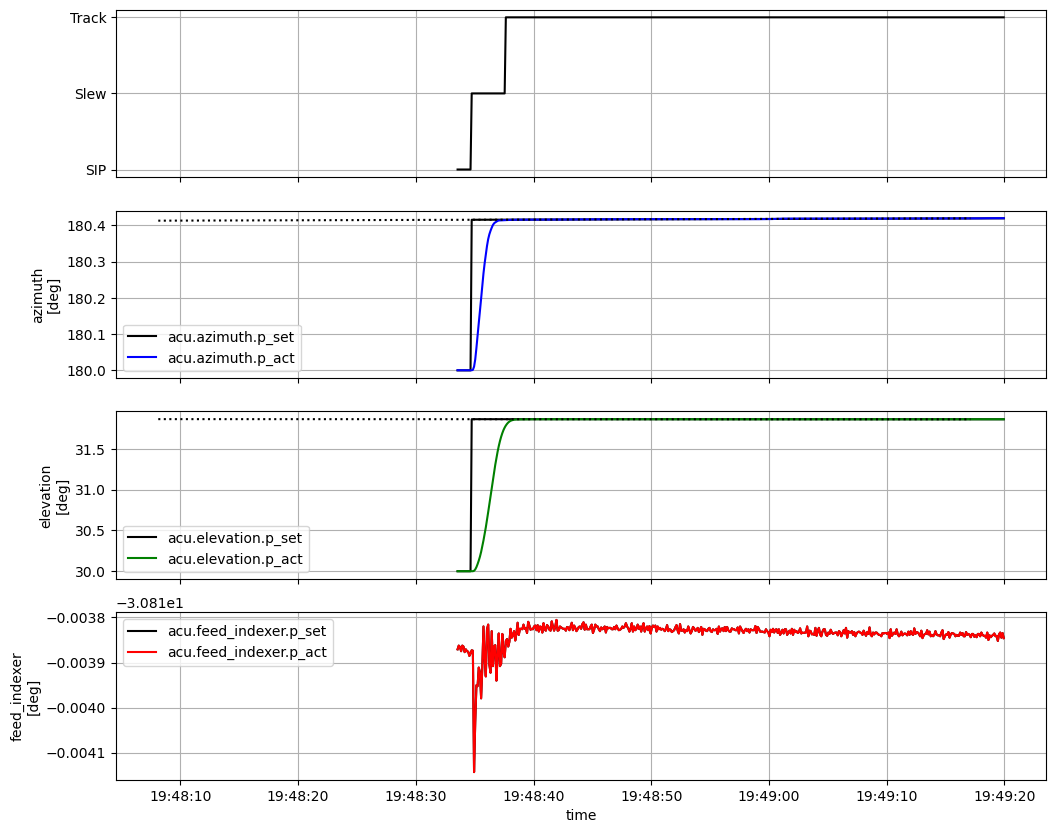

In [34]:
# the mke_sculib also has functionality for plotting a tracking table
# mke_sculib.plot_tt(tracking_table.time, tracking_table.az, tracking_table.el, api.t_internal)

# plot the session history against the tracking table
mke_sculib.plot_motion(last_session, df_tt = tracking_table)

In [35]:
api.shutdown()

[2024-10-12 19:49:36.32Z - sculib] === INITIATING SHUTDOWN ROUTINE ===
[2024-10-12 19:49:36.92Z - sculib] Stowing...
[2024-10-12 19:49:37.52Z - sculib] move to az: 1.0000 el: 88.7500
[2024-10-12 19:50:45.23Z - sculib] wait for 0.5s
[2024-10-12 19:50:49.25Z - sculib] wait for 0.5s
[2024-10-12 19:50:49.75Z - sculib] wait for 1.0s
[2024-10-12 19:50:52.26Z - sculib] wait for acu.stow_pin_controller.azimuth_status: 3 (currently at: 1)
[2024-10-12 19:51:24.99Z - sculib]   -> done
[2024-10-12 19:51:26.50Z - sculib] Releasing Command Authority...
[2024-10-12 19:51:27.41Z - sculib] === SHUTDOWN ROUTINE COMPLETED ===


___
# EXAMPLE CONNECTION TO "SKAMPI" TYPE DISH

In [37]:
skampi = mke_sculib.load('skampi')
skampi

could not load "params_json" from server
[2024-10-12 19:51:55.29Z - sculib] loaded dish: scu object with antenna_id: "skampi" @http://10.96.64.10:8080, dish_type: "skampi" (verified)


scu object with antenna_id: "skampi" @http://10.96.64.10:8080, dish_type: "skampi" (verified)

In [38]:
skampi.determine_dish_type()


'skampi'

In [39]:
skampi.ping()

True

In [40]:
skampi.show()

[2024-10-12 19:51:58.30Z - sculib] 10.96.64.10 starting data stream in new thread...
[2024-10-12 19:51:59.41Z - sculib] 10.96.64.10 --> datasteam started...
[2024-10-12 19:51:59.41Z - sculib] 10.96.64.10 waiting for data stream to provide first data...
[2024-10-12 19:52:00.32Z - sculib] 10.96.64.10 --> stream started OK
